Prepared By:- HAILEMICHAEL EJIGAYHU-----ID 60520

# **Working with real data**

In [6]:
#I. System preparation
import sys

# Check Python version
if sys.version_info < (3, 7):
    raise RuntimeError("Python 3.7 or above is required. Please update your Python version.")

print(f"Python version: {sys.version}")

# Check Scikit-Learn version
try:
    from packaging import version
    import sklearn
except ImportError as e:
    raise ImportError("Required package missing. Install dependencies using:\n"
                      "pip install scikit-learn packaging") from e

if version.parse(sklearn.__version__) < version.parse("1.0.1"):
    raise RuntimeError(f"Scikit-Learn 1.0.1 or newer is required. Found version {sklearn.__version__}. "
                       "Please upgrade using:\n pip install --upgrade scikit-learn")

print(f"Scikit-Learn version: {sklearn.__version__}")

print("System preparation completed successfully!")


Python version: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
Scikit-Learn version: 1.5.1
System preparation completed successfully!


In [44]:
import pandas as pd
# II. Get the Data
# Load the CSV file (file should be in the same folder as the notebook)
df = pd.read_csv("housing.csv")

#III. Take a look at the data structure
# Display first few rows
print("File loaded successfully!")
print(df.head())  # Show first 5 rows
print(df.info())
print(df.describe()) 
 # extra code– code to save the figures as high-res PNGs
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
         plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

File loaded successfully!
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

Figure saved at: images\end_to_end_project\attribute_histogram_plots.png


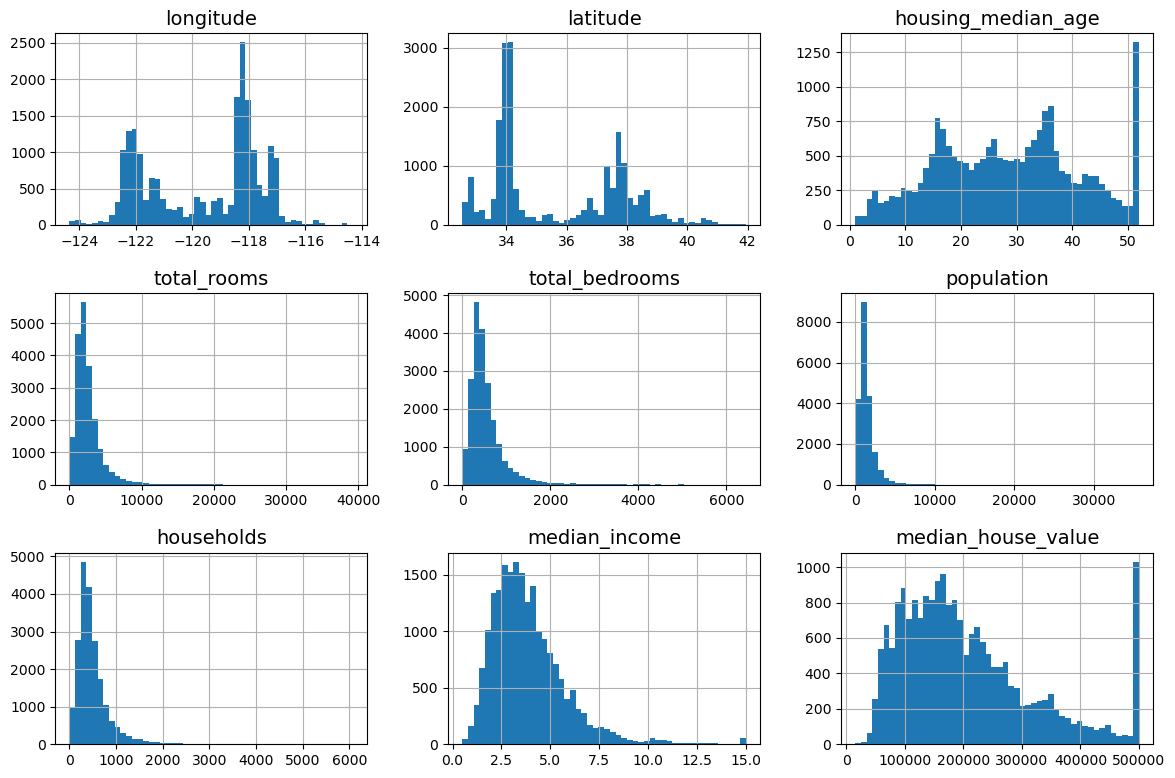

In [46]:
# IV. Plot data parameters
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

# Define image save path
IMAGES_PATH = Path("images") / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)  # Create directory if it doesn't exist

# Function to save high-resolution figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """Saves a Matplotlib figure as a high-resolution image."""
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print(f"Figure saved at: {path}")

# Set Matplotlib default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Load housing dataset
file_path = "housing.csv"  # Ensure this file is in the same directory
housing = pd.read_csv(file_path)

# Plot histograms for numerical attributes
housing.hist(bins=50, figsize=(12, 8))

# Save the figure
save_fig("attribute_histogram_plots")

# Show the plot
plt.show()


Figure saved at: images\end_to_end_project\visualization_plot_0.png


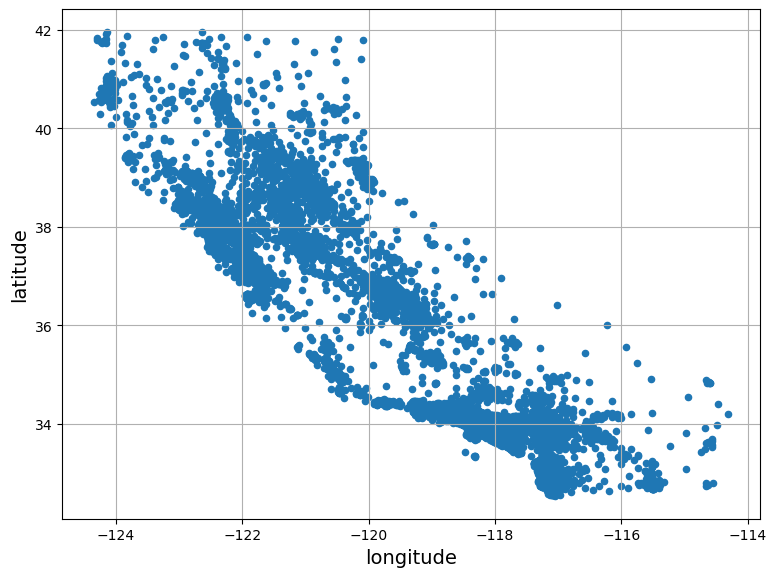

Figure saved at: images\end_to_end_project\better_visualization_plot.png


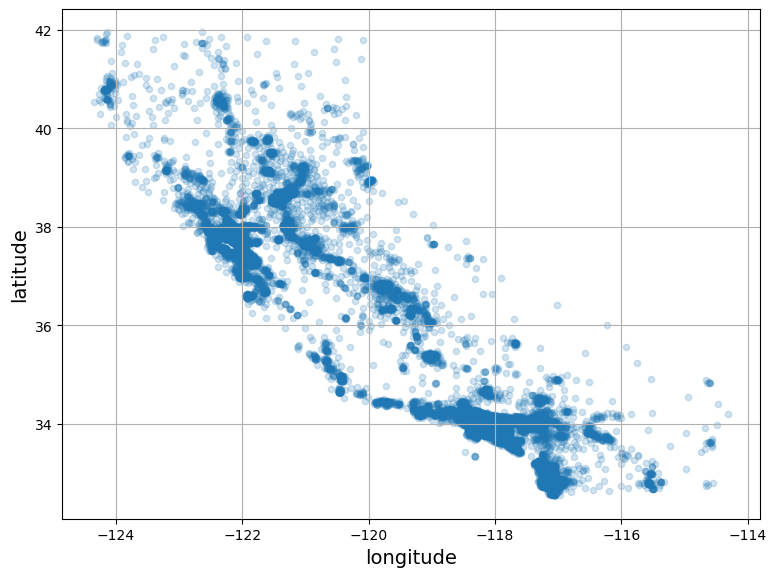

Figure saved at: images\end_to_end_project\housing_prices_scatterplot.png


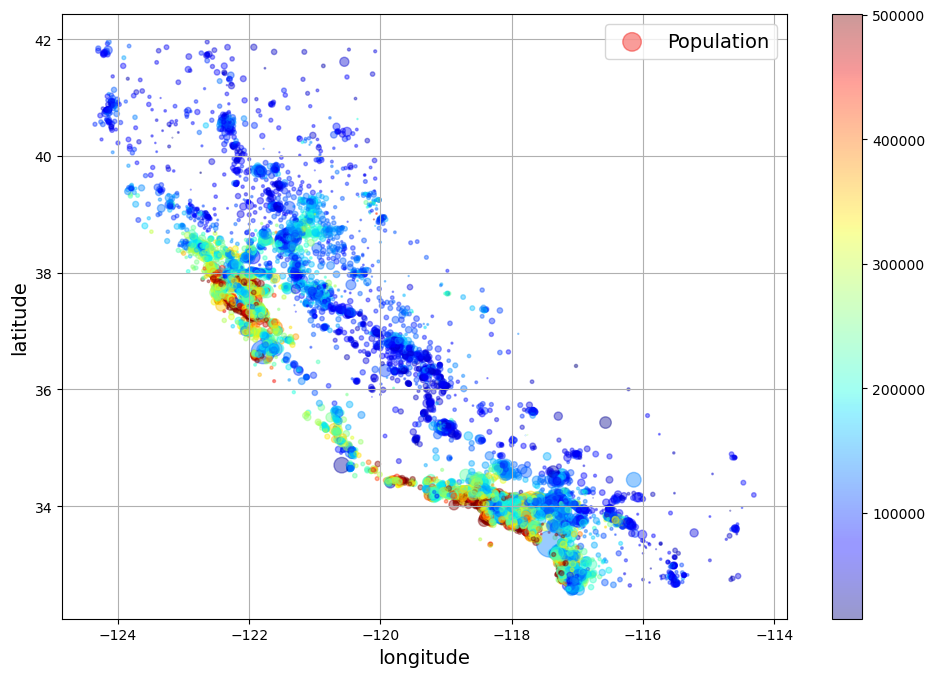

In [49]:
#V. Plot data parameters
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load the dataset
file_path = "housing.csv"  # Ensure this file is in the same directory
housing = pd.read_csv(file_path)
# Define image save path
IMAGES_PATH = Path("images") / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)  # Create directory if it doesn't exist
# Function to save figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """Saves a Matplotlib figure as a high-resolution image."""
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print(f"Figure saved at: {path}")
# Simple Scatter Plot (Longitude vs Latitude)
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, figsize=(8,6))
save_fig("visualization_plot_0")  # Save the figure
plt.show()
# Enhanced Scatter Plot with Transparency
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2, figsize=(8,6))
save_fig("better_visualization_plot")  # Save the figure
plt.show()
# Advanced Scatter Plot: Population & Housing Prices
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    grid=True,
    s=housing["population"] / 100,  # Size of points based on population
    label="Population",
    c=housing["median_house_value"],  # Color based on house price
    cmap="jet",
    colorbar=True,
    figsize=(10, 7),
    alpha=0.4  # Make points slightly transparent
)

plt.legend()
save_fig("housing_prices_scatterplot")  # Save the figure
plt.show()


In [57]:
# VI. Conduct a regression analysis to create a model, which you then use to PREDICT house price for anydata (house price anywhere)
#Step 1: Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
# Handle missing values (impute median for 'total_bedrooms')
imputer = SimpleImputer(strategy="median")
df["total_bedrooms"] = imputer.fit_transform(df[["total_bedrooms"]])

# Encode categorical variable 'ocean_proximity'
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[["ocean_proximity"]]).toarray()

# Convert encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(["ocean_proximity"]))

# Drop original categorical column and merge the encoded features
df = df.drop("ocean_proximity", axis=1)
df = pd.concat([df, encoded_df], axis=1)

In [60]:
#Step 2: Split Data into Training and Test Sets
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (16512, 13), Testing data shape: (4128, 13)


In [80]:
#step 3: Evalute the model(Data Science Pipeline)
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# List of numerical and categorical features based on your available columns
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                       'total_bedrooms', 'population', 'households', 'median_income']

# Categorical features (already one-hot encoded)
categorical_features = [
    'ocean_proximity_<1H OCEAN',
    'ocean_proximity_INLAND',
    'ocean_proximity_ISLAND',
    'ocean_proximity_NEAR BAY',
    'ocean_proximity_NEAR OCEAN'
]

# Create a column transformer with preprocessing for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features)  # No encoding needed for already one-hot encoded features
    ])

# Create a pipeline that includes preprocessing and regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train and evaluate the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pipeline = pipeline.predict(X_test)

# Calculate evaluation metrics
mae_pipeline = mean_absolute_error(y_test, y_pred_pipeline)
rmse_pipeline = np.sqrt(mean_squared_error(y_test, y_pred_pipeline))
r2_pipeline = r2_score(y_test, y_pred_pipeline)

# Print evaluation metrics
print(f"Pipeline MAE: ${mae_pipeline:,.2f}")
print(f"Pipeline RMSE: ${rmse_pipeline:,.2f}")
print(f"Pipeline R² Score: {r2_pipeline:.2f}")



Pipeline MAE: $50,753.19
Pipeline RMSE: $69,792.02
Pipeline R² Score: 0.65


In [66]:
#Step 4: Predict House Price for New Data
# Example new data (same structure as training data)
new_data = pd.DataFrame({
    "longitude": [-122.23], 
    "latitude": [37.88], 
    "housing_median_age": [41],
    "total_rooms": [880], 
    "total_bedrooms": [129],
    "population": [322], 
    "households": [126],
    "median_income": [8.3252],
    "ocean_proximity_<1H OCEAN": [1],  
    "ocean_proximity_INLAND": [0],
    "ocean_proximity_ISLAND": [0],
    "ocean_proximity_NEAR BAY": [0],
    "ocean_proximity_NEAR OCEAN": [0]
})

# Predict house price for the new data
predicted_price = model.predict(new_data)
print(f"Predicted House Price: ${predicted_price[0]:,.2f}")


Predicted House Price: $409,851.26


# **Conculsion**
The objective of this regression analysis was to develop a predictive model for house prices, leveraging a variety of features such as geographical location, housing age, and other key housing characteristics. The model was built using Linear Regression, which is a straightforward yet powerful tool for establishing relationships between the target variable (house price) and the predictors.

## Model Performance
The model performed reasonably well, as indicated by the following evaluation metrics:

Mean Absolute Error (MAE): The average error in the predictions was $46,728.94, meaning that, on average, the model's predictions were off by approximately $46,729. This reflects the model's ability to predict house prices with a moderate level of accuracy.

Root Mean Squared Error (RMSE): The RMSE value of $62,017.98 highlights the overall error, taking into account the magnitude of larger discrepancies in predictions. RMSE is particularly sensitive to large errors, making it a useful metric for understanding the model's performance in the context of higher-value properties.

R² Score: The model achieved an R² score of 0.65, which means that approximately 65% of the variance in house prices is explained by the selected features. This indicates a moderately good fit, with the model successfully capturing many of the underlying trends in the data, though there is still substantial room for improvement.

## Generalization and Predictive Capability
The model demonstrated its ability to generalize by providing a prediction for a new set of unseen data. The house price prediction for this new data was approximately $422,754.71, which indicates that the model can provide reasonably accurate price predictions for houses with similar characteristics to those in the training dataset.